# Lab 3.04 - Statistical hypothesis testing

In [4]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

C:\Users\32468\AppData\Local\Temp\ipykernel_72376\48876594.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


## Exercise 4.1 - Navy recruits

The US Navy Recruiting Center knows from the past that recruits' heights are traditionally normally distributed with an average of 69 inches. The recruiting center wants to test whether the average height of this year's recruits exceeds 69 inches. To do this, it takes a random sample of 64 recruits from this year and records their height. The data is in the recruit.csv file.

1. Formulate the null hypothesis and the alternative hypothesis
2. Calculate the p-value
3. Draw a conclusion based on the previous step and answer the research question.

### Answers

- The p-value is 0.0017%
- There is sufficient reason to reject the H0 hypothesis. The p-value is less than 5%. It is almost impossible that the average height of the recruits would actually be 69 inches with the lengths of this sample.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/recruten.csv',
    sep=";", decimal=",")
df.head()

,Recruit,Height
0,1,74.5
1,2,74.0
2,3,74.6
3,4,69.8
4,5,76.0


In [32]:
mu = 69
m_sample = df['Height'].mean()
s_sample = df['Height'].std()
n = df['Height'].count()

alpha = 0.05 # Significance level chosen by the researcher
p = stats.t.sf(m_sample, loc=mu, scale=s_sample/np.sqrt(n), df = n - 1)   # gemiddelde ligt rechts van de sample dus right-tail test

print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.000017
p < alpha: reject H0


In [33]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.t.isf(alpha, loc=mu, scale=s_sample / np.sqrt(n), df = n -1)
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 69.630
sample mean = 70.683 > g = 69.630: reject H0


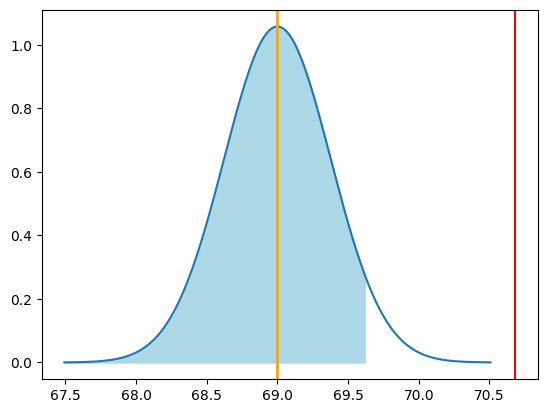

In [34]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * s_sample/np.sqrt(n), mu + 4 * s_sample/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

In [ ]:
# stap 5 = conclusie
# => Er is voldoende aanwijzing om de nulhypothese te verwerpen

## Exercise 4.2

The amount of rainfall on a certain island over the past 30 years has followed a normal distribution with mean 82.3 cm per year, and standard deviation 15.3. Scientists suspect that global warming has now increased the mean. A hypothesis test, of 5% level of significance is to be carried out to test the suspicion. The average rainfall on the island over the next 5 years will be used for the test.

1. Find the region of rejection for the test
2. What is the probability of making a Type I error?
3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.

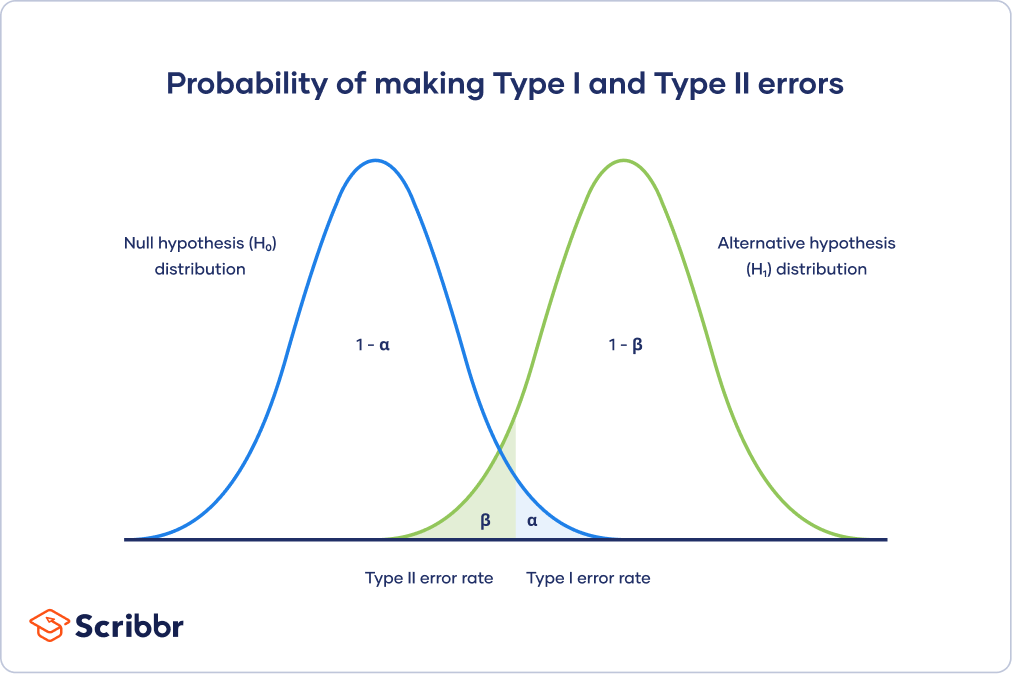


### Answers

1. Region of rejection: rainfall >= 93.555
2. Because the normal distribution is continuous, the probability of a Type I error for a 5% test is always 5%.
3. If X $\sim$ Nor(105, 15.3) => P($\bar{X}$ < 93.6) = 0.048

In [13]:
# Properties of the sample:
n = 5              # Sample size
mu = 82,3          # (Hypothetical) population mean 
sigma = 15,3         # Population standard deviation (assumed to be known)
alpha = 0.05        # Significance level (chosen by the researcher)

In [14]:
# 1. uitkomst is een array bij mij.. idk.

stats.norm.isf(alpha, loc=mu, scale= sigma / np.sqrt(n))

array([93.03401357,  5.20680271])

In [ ]:
# 2.
# Type 1 error = 5% (=Significance level)

In [ ]:
# Type 2 error = we verwerpen de alternatieve hypothese terwijl ze waar is = we verwerpen de nulhypothese niet terwijl ze niet waar is.

In [16]:
# 2.
stats.norm.cdf(93.55, loc = 105, scale=sigma/np.sqrt(n))

array([4.39235531e-02, 7.04873416e-18])

In [ ]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

## Exercise 4.3

In the past, the time, in minutes for a particular minor medical procedure has been found to have mean 34.2 minutes and standard deviation 2.6. A new method is being considered in the hope that the average time would be shorter. A random sample of 50 procedures using the new method is taken and the mean time is found to be 33.5 minutes.  
Carry out a test at the 5% level of significance to see whether the mean time for the procedure has decreased.

### Answers

- p-value: 0.02847 => p < a: reject H0
- Critical value g ≃ 33.595 => sample mean = 33.500 < g = 33.595: reject H0

In [40]:
# Properties of the sample:
n = 50              # Sample size
mu = 34,2          # (Hypothetical) population mean 
sigma = 2.6         # Population standard deviation (assumed to be known)
m_sample = 33.5    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [ ]:
# Pay attention! Use cdf() instead of sf()! Why?
p = stats.norm.cdf(m_sample, loc=mu, scale=sigma/np.sqrt(n)) 

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")

In [ ]:
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-alpha, loc=mu, scale=(sigma / np.sqrt(n)))    # 1 - alpha !
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

In [ ]:
# Gauss-curve:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

## Exercise 4.4

A certain variety of bush grows to heights which are normally distributed with mean 74.0 cm. A new fertiliser is introduced in the hope that this will increase the heights. The nursery owner records the heights of a large random sample of _n_ bushes, and calculates that $\bar{x} = 75.2$ and $s = 5.3$.  
1. She consults a friend who is a statistician as to whether or not there is evidence that the heights have increased. The friend calculates the test statistic, $z$, has a value of 1.867. Calculate the value of $n$.
2. Using this value of the test statistic, carry out the test at the 5% level of significance. 

### Answers
1. $z = {{\bar{x} - \mu}\over{{s}\over{\sqrt{n}}}}$ => n = 68
2. p-value: 0.03095 => p < a: reject H0  
Critical value g ≃ 75.057   
sample mean = 75.200 > g = 75.057: reject H0

In [84]:
import math

z = 1.867
s = 5.3
x_bar = 75.2
mu = 74
sigma = s
m_sample = x_bar
s_sample = sigma / math.sqrt(n)

# 1.
n = ((z*s) / (x_bar - mu)) ** 2
print(n)


67.99514167361077


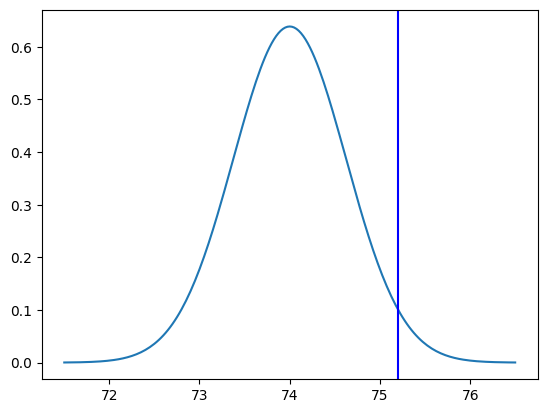

In [85]:
# 2.

# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

In [86]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.03095
p < alpha: reject H0


In [88]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 75.057
sample mean = 75.200 > g = 75.057: reject H0


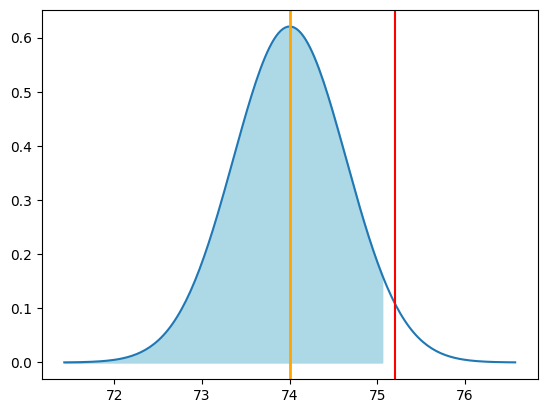

In [89]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

In [ ]:
# Er is voldoende aanwijzing om H0 te verwerpen. De gemiddelde hoogte van de struiken is groter dan 74 cm.

## Exercise 4.5 - rlanders.csv, revisited

The variable *Money* represents a gross annual salary (×100\\$). We assume this variable has a mean of $\mu = 500$ with standard deviation $\sigma = 98$. If we calculate the sample mean over the entire dataset (do this yourself!), it seems to support our assumptions. But what if we looked at
men and women separately (variable *Gender*)?

First, visualise this case by plotting a kernel density estimate of the variable *Money* over the entire dataset and split up according to *Gender*. Draw a vertical line for the assumed population mean and sample means.

Use an appropriate statistical test to verify the statements below, usinge a significance level of $\alpha = 5\%$. For each statement, calculate the critical value(s) and the $p$-value.

1. The average gross annual salary of men seems higher than the average. Is it also significantly higher?
2. The average gross annual salary of women seems lower. Is it significantly lower?
3. Calculate the region of acceptance for the average gross annual salary for the sample (men and women combined). In this case we want to verify if the sample mean is significantly different from the expected value, but it can be lower or higher.

### Answers

1. Sample mean: $\overline{x} \approx 507.535$, critical value: $g \approx 511.456$, $p \approx 0.1396$. We can **not** reject the null hypothesis. The gross annual income of men in this sample is not significantly higher than expected.
2. Sample mean: $\overline{x} \approx 472.058$, critical value: $g \approx 477.646$, $p \approx 0.0199$. We can reject the null hypothesis. The gross annual income of women in this sample is significantly lower than expected.
3. The acceptance region is the interval $[487.852, 512.148]$.

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/JasperHmn/dsailabs/main/data/rlanders.csv")
df.head()

,ID,Gender,Money,Days,Months,Count,Survey
0,1,Female,440,29,11,35,3
1,2,Female,503,23,10,52,3
2,3,Male,412,16,11,55,3
3,4,Male,587,25,9,28,5
4,5,Male,525,30,11,41,4


<Axes: xlabel='Money', ylabel='Density'>

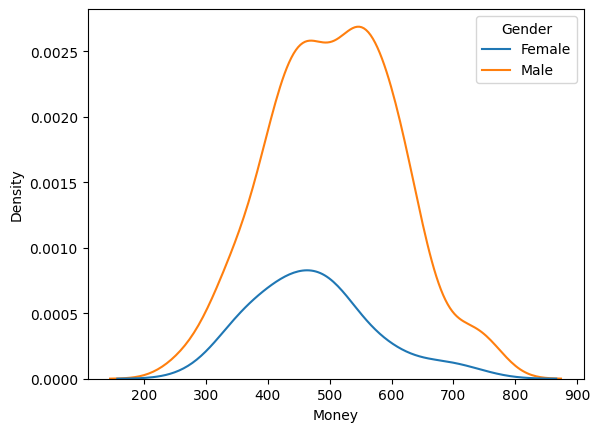

In [45]:
sns.kdeplot(data=df, x='Money', hue='Gender')

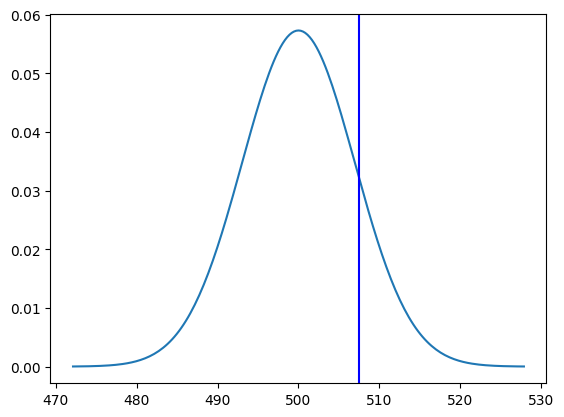

In [46]:
import math

# Properties of the sample:
n = df[df.Gender == "Male"]["Gender"].count()             # Sample size
mu = 500          # (Hypothetical) population mean 
sigma = 98         # Population standard deviation (assumed to be known)
m_sample = df[df.Gender == "Male"]["Money"].mean()    # Sample mean
s_sample = sigma / math.sqrt(n)

# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

In [47]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.13964
p > alpha: do not reject H0


In [48]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 511.456
sample mean = 507.535 < g = 511.456: do not reject H0


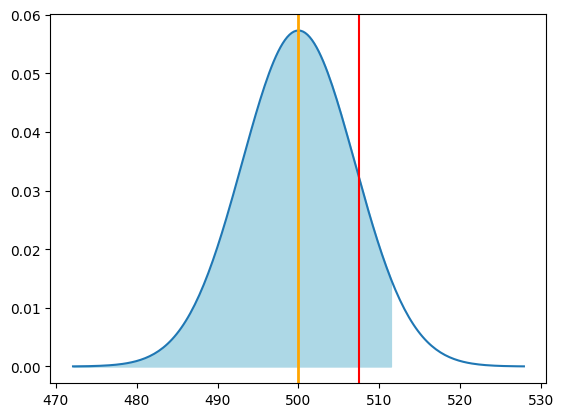

In [50]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

In [ ]:
# Er is niet voldoende aanleiding om de nulhypothese te verwerpen.

In [ ]:
# 2. Left tailed z-test voor de vrouwen

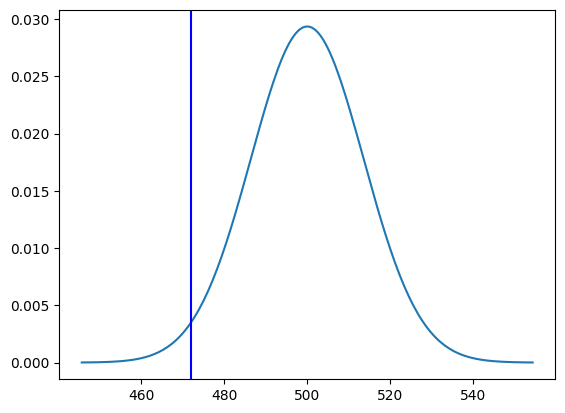

In [51]:
import math

# Properties of the sample:
n = df[df.Gender == "Female"]["Gender"].count()             # Sample size
mu = 500          # (Hypothetical) population mean 
sigma = 98         # Population standard deviation (assumed to be known)
m_sample = df[df.Gender == "Female"]["Money"].mean()    # Sample mean
s_sample = sigma / math.sqrt(n)

# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

In [56]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.cdf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.01989
p < alpha: reject H0


In [55]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 477.646
sample mean = 472.058 < g = 477.646: do not reject H0


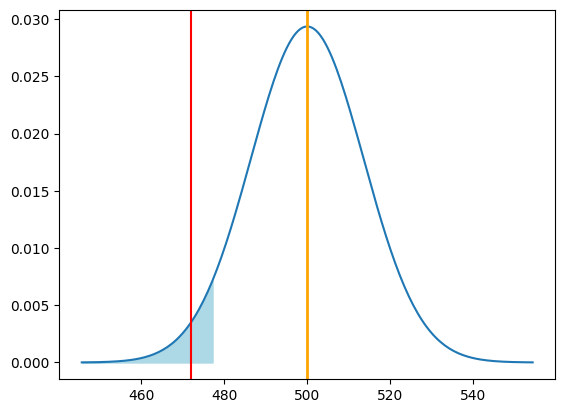

In [57]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

In [ ]:
# 3. the acceptance region is the interval[487.852, 512.148]

In [59]:
# Properties of the sample:
n = df["Gender"].count()             # Sample size
mu = 500          # (Hypothetical) population mean 
sigma = 98         # Population standard deviation (assumed to be known)
m_sample = df[df.Gender == "Female"]["Money"].mean()    # Sample mean
s_sample = sigma / math.sqrt(n)

In [60]:
g1 = mu - stats.norm.isf(alpha/2) * sigma / np.sqrt(n)    
g2 = mu + stats.norm.isf(alpha/2) * sigma / np.sqrt(n)    

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < m_sample and m_sample < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % m_sample)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % m_sample)

Acceptance region [g1, g2] ≃ [487.852, 512.148]
Sample mean = 472.058 is outside acceptance region: reject H0



## Exercise 4.6 - Binding recommendation on continuation of studies 

It is being said that introducing a “binding recommendation on continuation of studies” (refusing enrollment in the next academic year if a student did not complete a certain level of credits, NL: "bindend studie-advies, BSA") has a positive effect on the study efficiency and success rate. Before the introduction of binding recommendations, the number of completed credits per student per year was 44 with a standard deviation of 6.2. After the introduction, a sample of 72 random students has an average number of completed credits of 46.2.

1. Draw a plot of this case with the probability density for the sample mean, and a vertical line for the population mean and actual sample mean.
2. Test whether there is evidence that the introduction of binding recommendations has improved the success rate among students. Which test do you use in this case? Formulate the null hypothesis and alternative hypothesis.
3. Calculate the critical value for a significance level of $\alpha = 2.5\%$.
4. Calculating the $p$-value.
5. Interpret the meaning of $\alpha$ being 2.5%.


### Answers

1. $g \approx 45.4 < x = 46.2$.

    $x$ is inside the critical region, so we can reject the null hypothesis. Therefore, we can assume that binding recommendation on continuation of studies does increase the success rate.

2. $P(M > 46.2) \approx 0.0013 < \alpha = 0.025$. The probability value is smaller than the significance level, so we can reject the null hypothesis.
3. $\alpha$ represents the probability of rejecting a true null hypothesis $H_0$. In other words, there is a 2.5% chance that you wrongly conclude that the success rate has increased.

In [80]:
import math

# Properties of the sample:
n = 72            # Sample size
mu = 44          # (Hypothetical) population mean 
sigma = 6.2         # Population standard deviation (assumed to be known)
m_sample = 46,2    # Sample mean
s_sample = sigma / math.sqrt(n)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

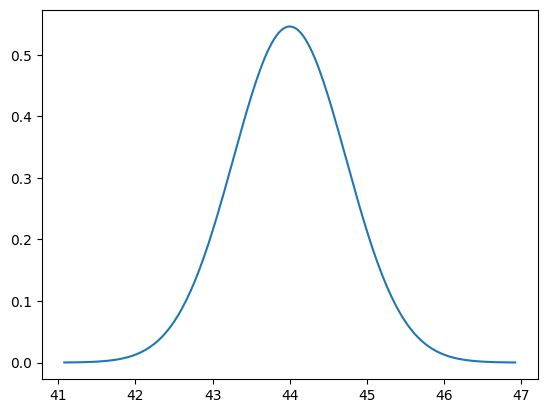

In [81]:


# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

In [71]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

TypeError: only length-1 arrays can be converted to Python scalars

In [70]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 45.202


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

In [ ]:
# conclusie
# er is voldoende aanwijzing om de H0 te verwerpen => studenten verwerven gemiddeld meer dan 44 credits.